# <span style='color:#7C93C3'>Assignment 8</span>
## <span style='color:#7C93C3'> CLUSTERING ANALYSIS </span>

### <span style='color:#6A9C89'>Objective:</span>
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

### <span style='color:#6A9C89'>Importing Necessary Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')
print('Imported')

Imported


### <span style='color:#6A9C89'>Exploring the file:</span>

In [2]:
## we can see that the document is in excel format and not in csv format
## so we can explore the excel file by 
file_name = 'EastWestAirlines.xlsx'
excel_data = pd.ExcelFile(file_name)

## checking number of sheets present
print(f'Number of sheets present in Excel file is {len(excel_data.sheet_names)}')

## check the name of sheets in Excel File
print(f'Name of the sheets are \n{excel_data.sheet_names}')

Number of sheets present in Excel file is 2
Name of the sheets are 
['Description', 'data']


In [3]:
## let's load the first Excel Sheet
description_sheet = excel_data.parse('Description')
description_sheet.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [4]:
## let's load the second sheet 'data'
data_sheet = excel_data.parse('data')
data_sheet.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
print(f'Shape of the data sheet is {data_sheet.shape}')
print(f'Number of columns ===> {data_sheet.shape[1]}')
print(f'Number of rows ======> {data_sheet.shape[0]}')

Shape of the data sheet is (3999, 12)
Number of columns ===> 12
Number of rows ======> 3999


In [6]:
data_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data_sheet.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
print(f'The columns of the dataset are\n\n{data_sheet.columns}')

The columns of the dataset are

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')


#### We mainly have to work on this data file.

### <span style='color:#6A9C89'>Data Pre-Processing:</span>

In [9]:
## checking if there is null values are not
if data_sheet.isnull().sum().sum() > 0:                                      ## Counts the total number of null values in the dataset.
    print(f'Number of null values present: {data_sheet.isnull().sum().sum()}')
    print('List of columns which have null values:')
    print(data_sheet.isnull().sum()[data_sheet.isnull().sum() > 0])          ## Filters columns that have at least one null value.
else:
    print('No null values found \nThe data is completely clean')

No null values found 
The data is completely clean


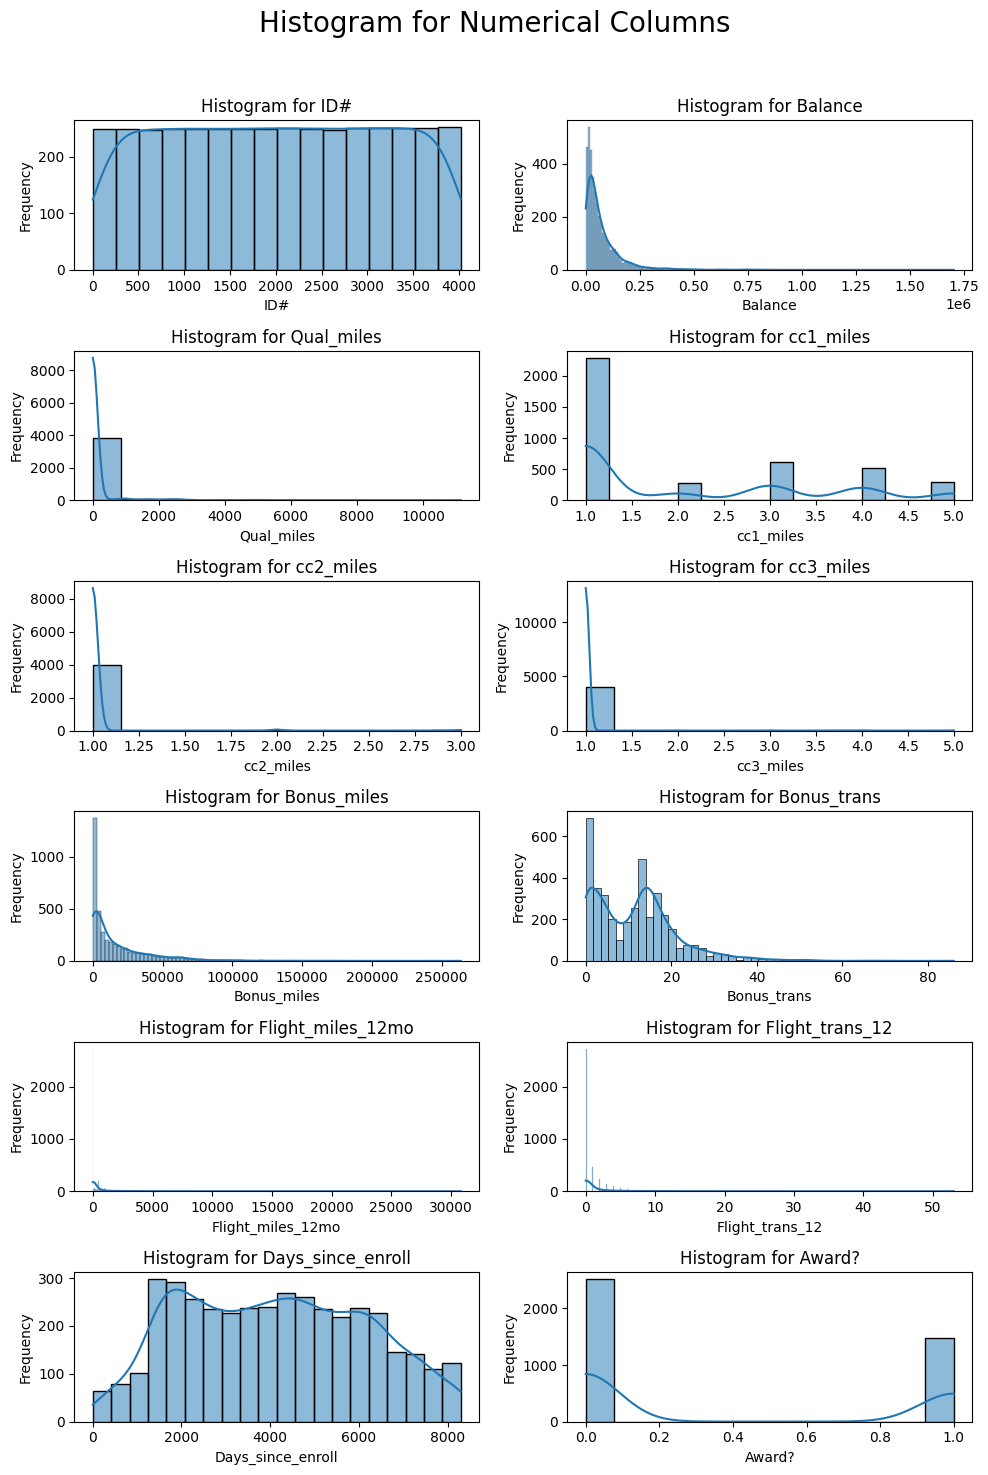

In [10]:
## histogram
import math
plt.figure(figsize=(10, 15))
plt.suptitle('Histogram for Numerical Columns', fontsize=20)

num_cols = len(data_sheet.columns)
for idx, col in enumerate(data_sheet.columns, 1):
    plt.subplot(math.ceil(num_cols / 2), 2, idx)  # Define a grid with rows and columns
    plt.title(f'Histogram for {col}')
    sns.histplot(data=data_sheet, x=col, kde=True)  # Use the column directly
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap with title
plt.show()

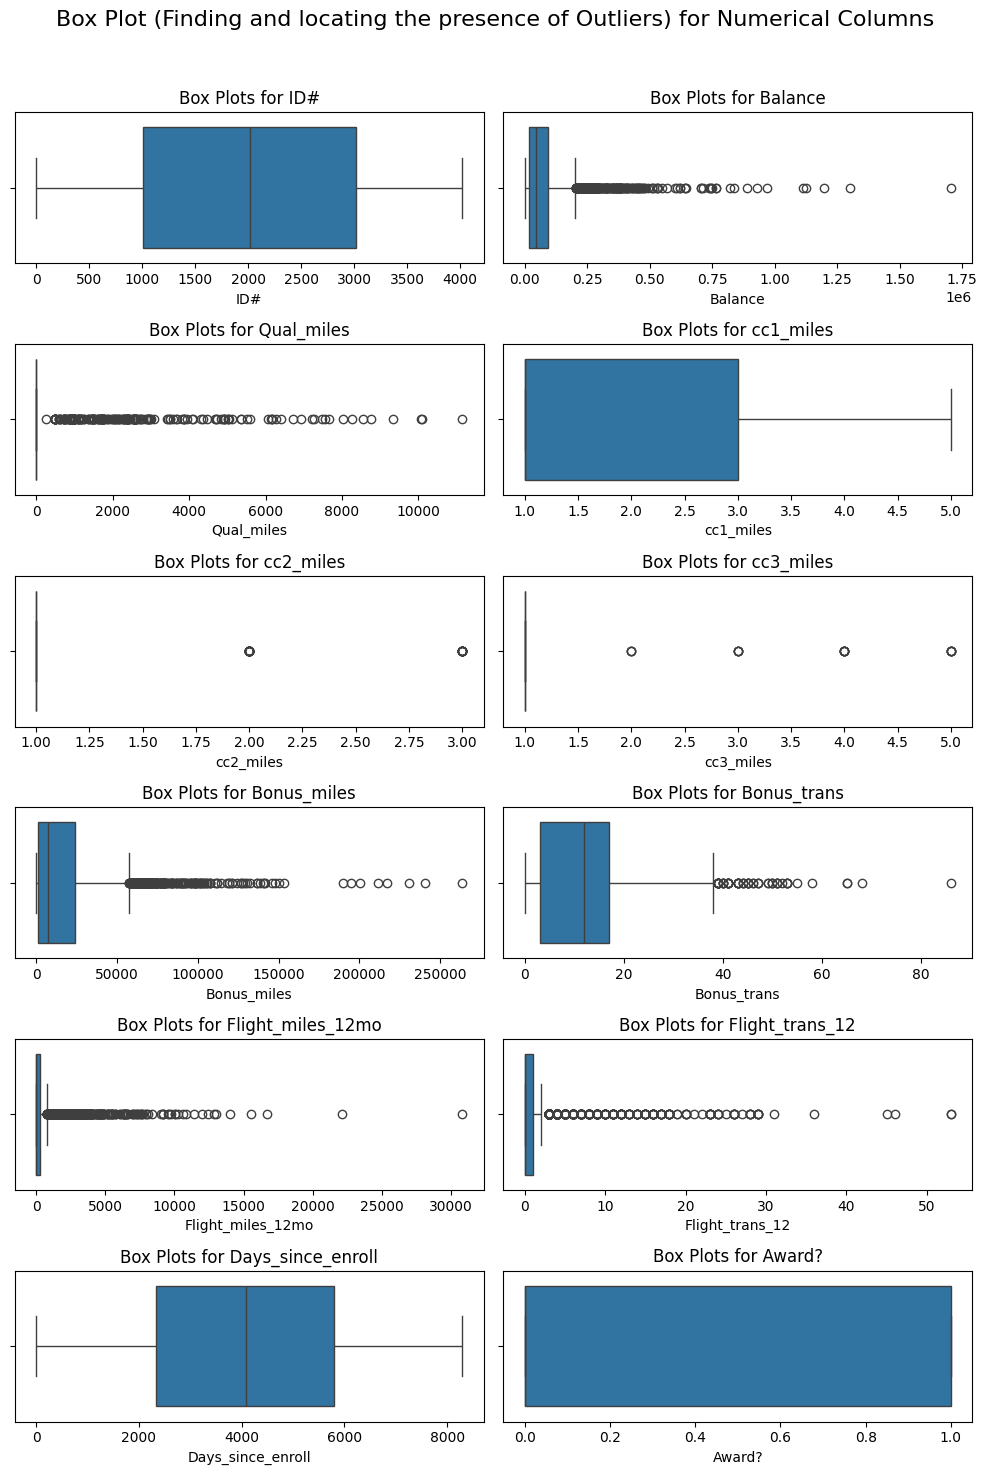

In [11]:
## box plots for finding outliers
plt.figure(figsize=(10, 15))  
plt.suptitle('Box Plot (Finding and locating the presence of Outliers) for Numerical Columns', fontsize=16)

for idx, i in enumerate(data_sheet.columns, 1):
    plt.subplot(math.ceil(num_cols / 2), 2, idx)
    sns.boxplot(data=data_sheet, x=i) 
    plt.title(f'Box Plots for {i}')
    

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### Columns with outliers
    1. Balance
    2. Qual_miles
    3. Bonus_miles
    4. Bonus_trans
    5. Flight_miles_12mo
    6. Flight_trans_12
##### We can perform inter-quratile-range to remove the outliers.

In [12]:
## removing outliers
columns_with_outliers = ['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12']

for column in columns_with_outliers:
    ## calculate q1, q2, and iqr
    q1 = data_sheet[column].quantile(0.25)
    q3 = data_sheet[column].quantile(0.75)

    ## inter-quantile-range
    iqr = q3 - q1

    ## calculating upper bound and lower bound
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    # Remove outliers
    data_sheet = data_sheet[(data_sheet[column] >= lower_bound) & (data_sheet[column] <= upper_bound)]

In [13]:
## confirming the shape to ensure outliers removal
data_sheet.shape

(2403, 12)

In [14]:
## let's check the correlation between the columns
data_sheet.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.219341,NaN,-0.178252,0.000344,0.009509,-0.153295,-0.119844,NaN,NaN,-0.964155,-0.135103
Balance,-0.219341,1.000000,NaN,0.464264,-0.007285,0.025747,0.459887,0.354580,NaN,NaN,0.236805,0.035452
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.178252,0.464264,NaN,1.000000,-0.067530,-0.004073,0.889830,0.615368,NaN,NaN,0.189352,0.322964
cc2_miles,0.000344,-0.007285,NaN,-0.067530,1.000000,-0.003032,0.016957,0.066897,NaN,NaN,0.012755,0.002177
cc3_miles,0.009509,0.025747,NaN,-0.004073,-0.003032,1.000000,0.075783,0.022434,NaN,NaN,0.000650,-0.017651
Bonus_miles,-0.153295,0.459887,NaN,0.889830,0.016957,0.075783,1.000000,0.616412,NaN,NaN,0.164281,0.344617
Bonus_trans,-0.119844,0.354580,NaN,0.615368,0.066897,0.022434,0.616412,1.000000,NaN,NaN,0.136858,0.250823
Flight_miles_12mo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight_trans_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


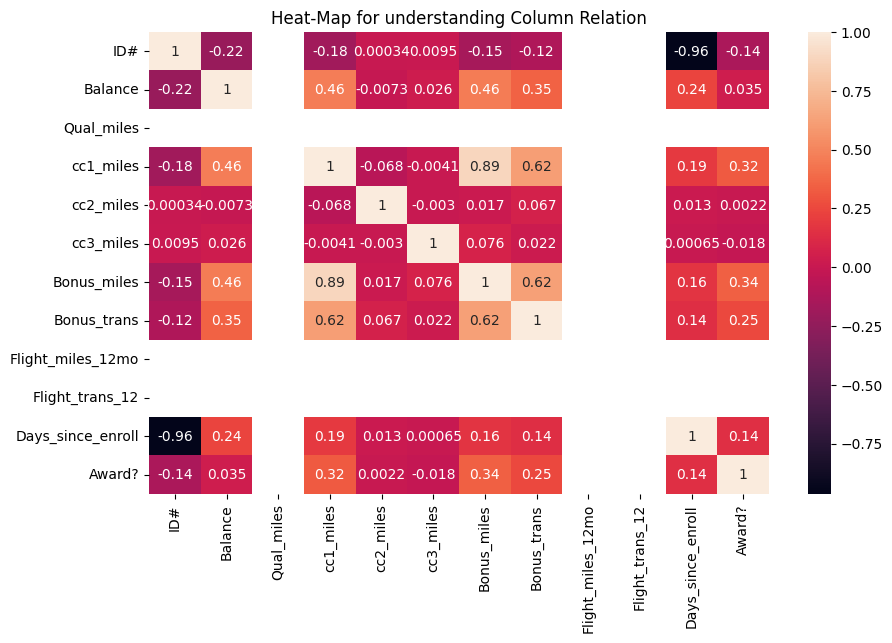

In [15]:
## Heat-Map for better understanding o relation
plt.figure(figsize=(10,6))
plt.title('Heat-Map for understanding Column Relation')
sns.heatmap(data_sheet.corr(), annot=True)
plt.show()

In [16]:
def corelated_cols(dataset, threshold):
    col_corr = set()  # Set to store column names with high correlation
    corr_matrix = dataset.corr()  # Calculate correlation matrix
    
    for i in range(len(corr_matrix.columns)):  # Loop through columns
        for j in range(i):  # Loop through rows before the diagonal
            if abs(corr_matrix.iloc[i, j]) >= threshold/100:  # Access with iloc
                col_name = corr_matrix.columns[i]  # Get the column name
                col_corr.add(col_name)  # Add the column name to the set
    return col_corr

In [17]:
## let's check the name of columns threshold greater that 70
cor_cols = corelated_cols(data_sheet, 70)
cor_cols

{'Bonus_miles', 'Days_since_enroll'}

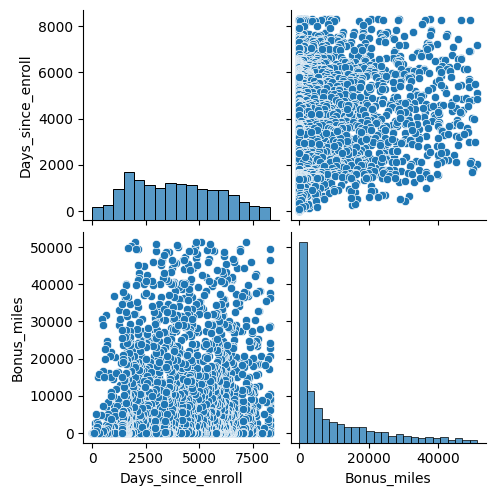

In [18]:
## pair-plot for the columns with more than 60% co-relation
sns.pairplot(data_sheet[list(cor_cols)])  # Use DataFrame directly with selected columns

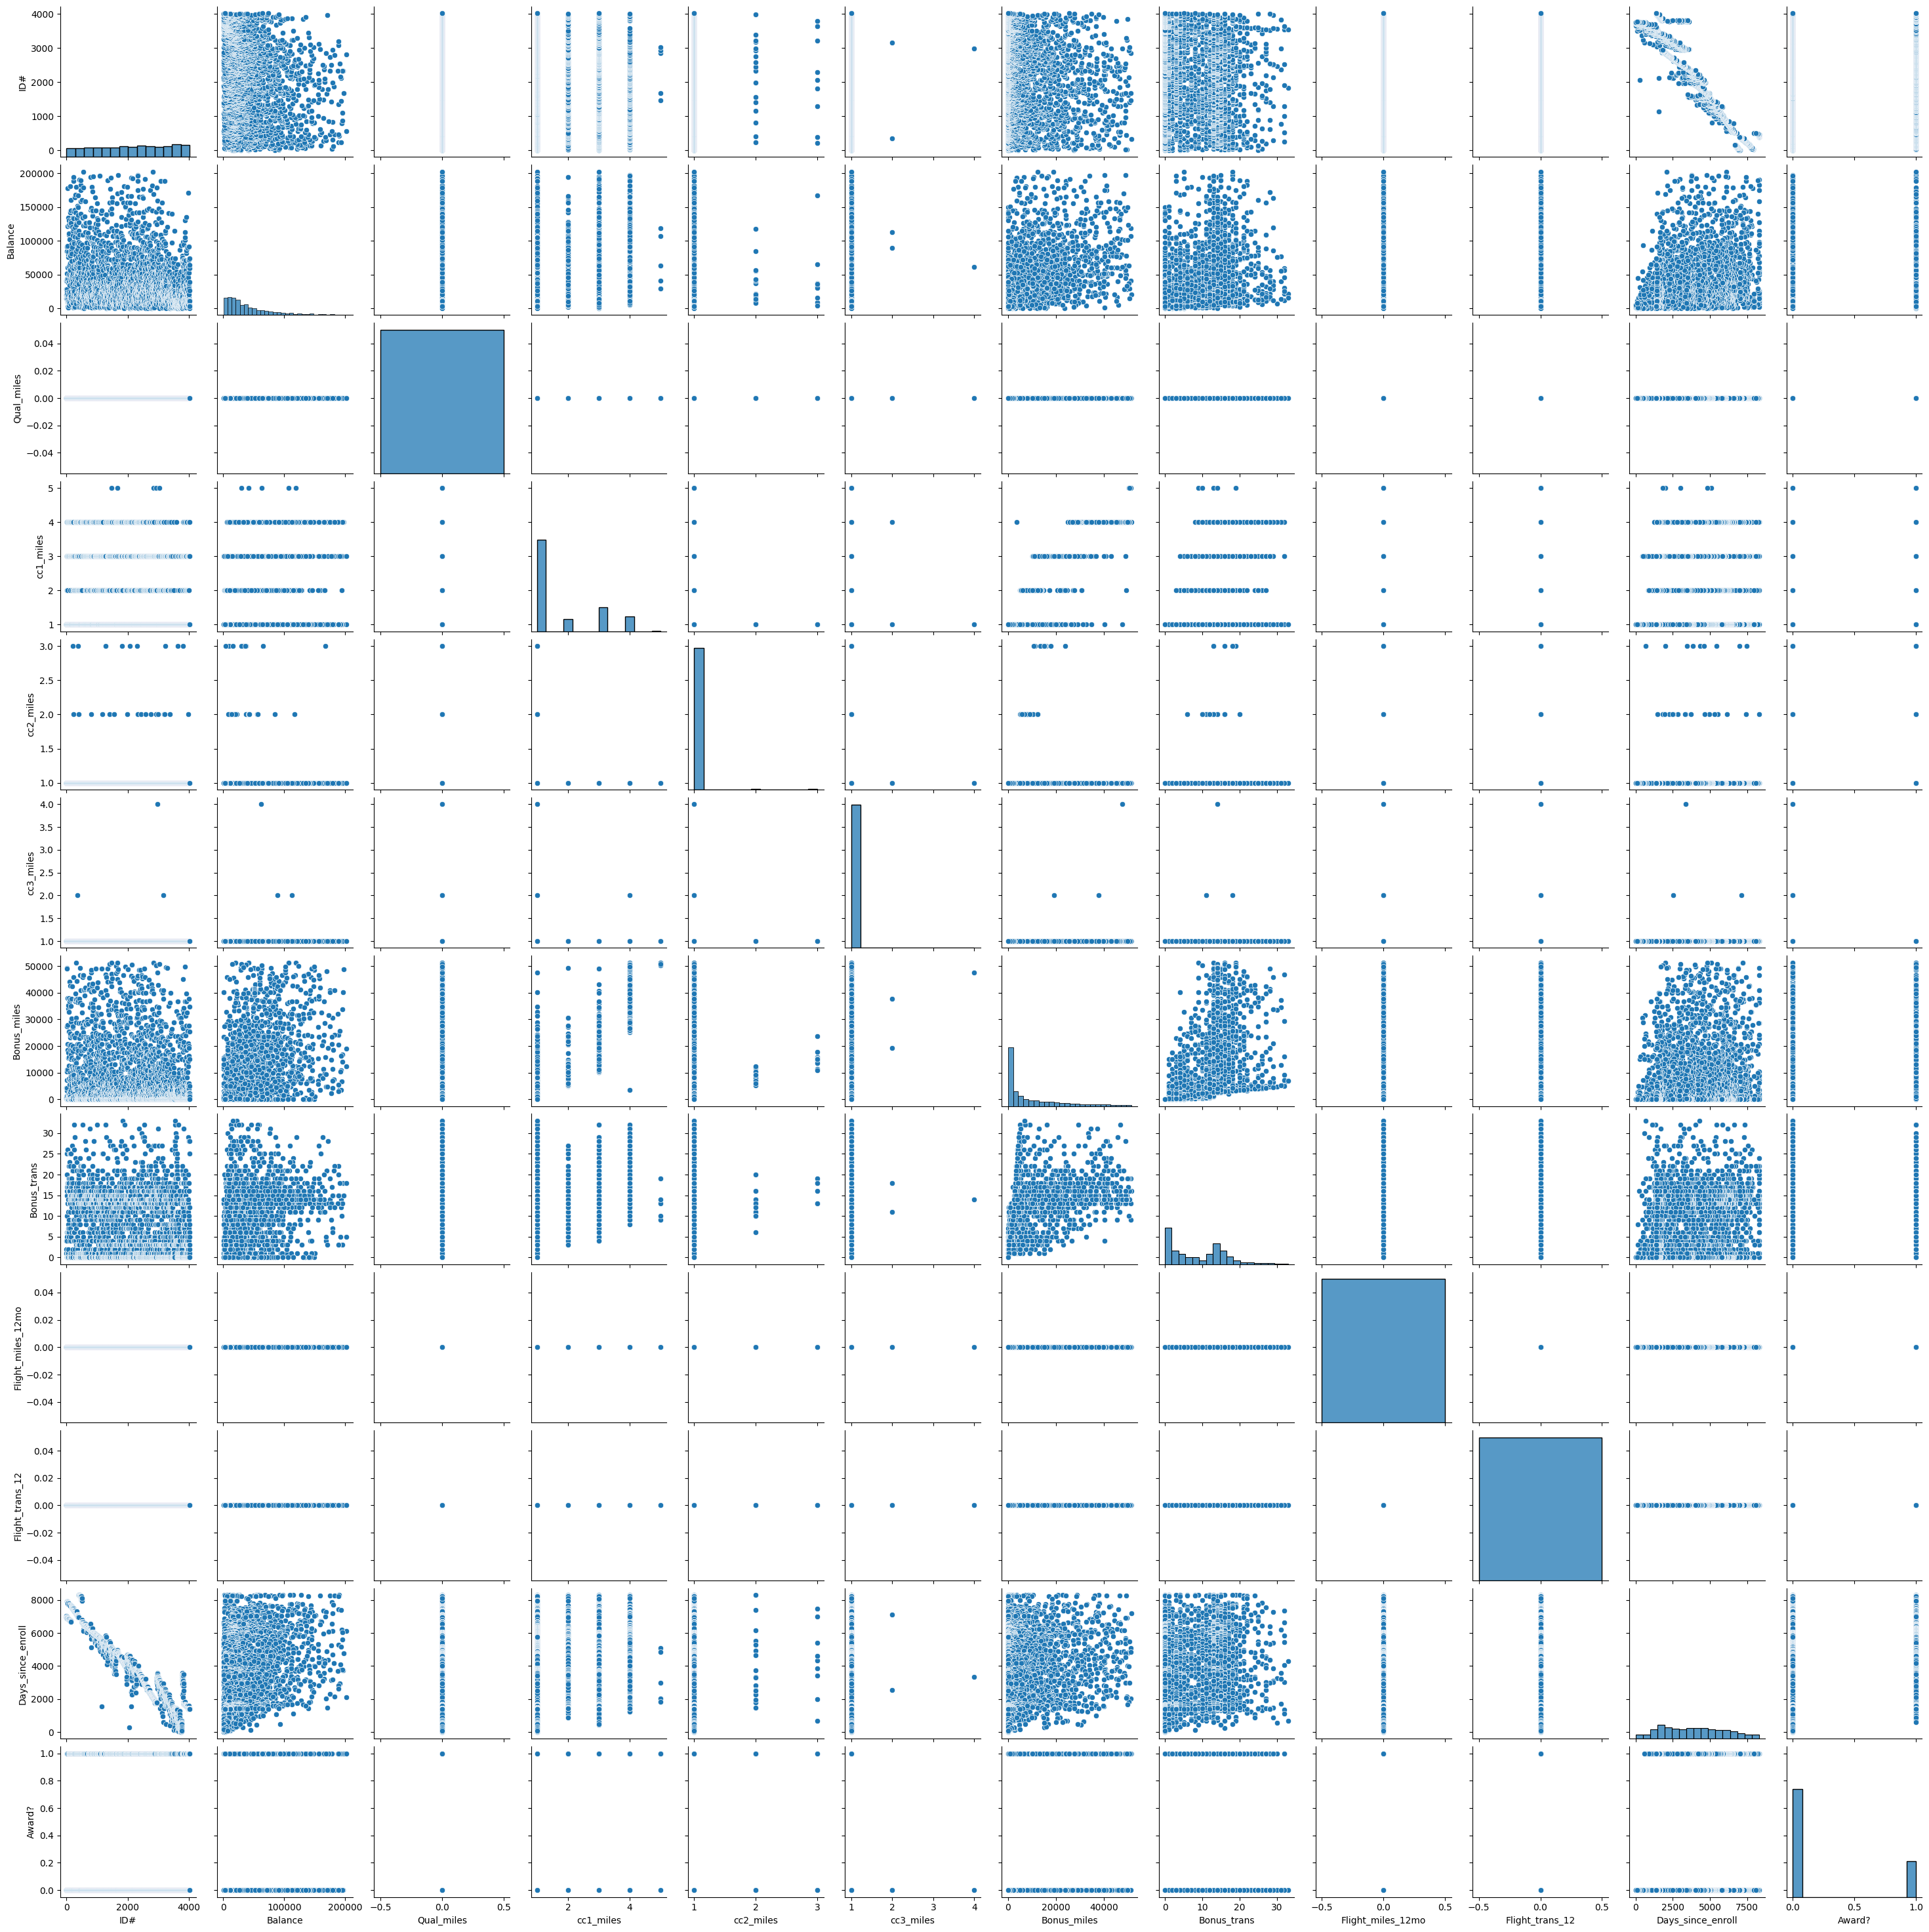

In [19]:
## pair-plot for whole data
sns.pairplot(data_sheet)

### <span style='color:#6A9C89'>Implementing Clustering Algorithms:</span>

##### before applying clustering techniques, let's work on dimensionality of the data
##### we can reduce the dimensions of the data by using principal componenet analysis (pca)
##### so, we saw that there is high co-relation between {'Bonus_miles', 'Days_since_enroll'}

In [20]:
## select features with sufficient variability
## Features with low variance may not contribute much to clustering
variances = data_sheet.var().sort_values(ascending=False)
variances

Balance              1.654774e+09
Bonus_miles          1.515553e+08
Days_since_enroll    4.251349e+06
ID#                  1.345970e+06
Bonus_trans          5.450355e+01
cc1_miles            1.178223e+00
Award?               1.863754e-01
cc2_miles            2.185271e-02
cc3_miles            4.575186e-03
Qual_miles           0.000000e+00
Flight_miles_12mo    0.000000e+00
Flight_trans_12      0.000000e+00
dtype: float64

### Features with low variance do not contribute significantly to clustering because they provide limited information to distinguish between data points.
    1. Lack of discrimination : means the feature values are very similar across the dataset.
    2. Distance Calculation : Clustering like K-Means rely on distance metrics (eg. Euclidean Distance) to group data points.
    3. Reduced Impact in Scaling : When features are standardized, low variance features will have very small scales compared to higher variance features.
    

### Potential Features for Clustering are:
    1. Balance
    2. Bonus Miles
    3. Days Since Enroll
    4. Bonus Trans
    5. Files miles 12mo    ## this have 0 variance, and we still take it because, it is a important feature
    6. Flight Trans 12     ## Similary this is also a important feature

In [21]:
# standardize the selected features
## selecting features for standardization
selected_features = data_sheet[['Balance', 'Bonus_miles', 'Bonus_trans', 'Days_since_enroll', 
                                'Flight_miles_12mo', 'Flight_trans_12']]

## standardizing the selected features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() ### initialization of standard scaler
scaled_features = scaler.fit_transform(selected_features)

### <span style='color:#6A9C89'>Principal Component Analysis:</span>

In [22]:
## applying pca (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) ### retaining 95% variance
pca_transformed = pca.fit_transform(scaled_features)

print(f'Explained variance ration by PCA components \n{pca.explained_variance_ratio_}')
print(f"Number of component choosen {pca.n_components_}")

Explained variance ration by PCA components 
[0.51281979 0.23534587 0.15976093 0.09207342]
Number of component choosen 4


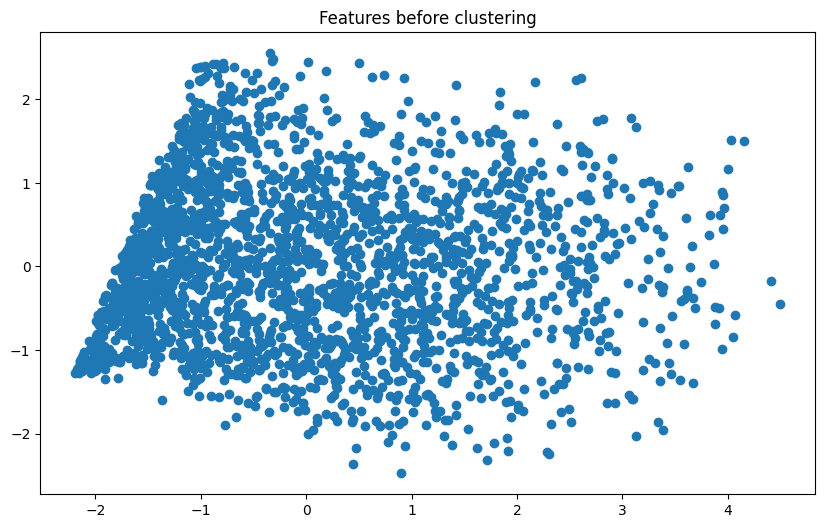

In [23]:
plt.figure(figsize=(10,6))
plt.title('Features before clustering')
plt.scatter(pca_transformed[:,0], pca_transformed[:,1])
plt.show()

## <span style='color:#6A9C89'>K-Means Clustering:</span>

#### <span style='color:#6A9C89'>Applying Elbow Method:</span>

In [24]:
## wcss : withing cluster sum of squares
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(pca_transformed)
    wcss.append(kmeans.inertia_) ## this refers to sum of squarred error

#### <span style='color:#6A9C89'>Plotting Elbow Curve:</span>

Text(0, 0.5, 'wcss values')

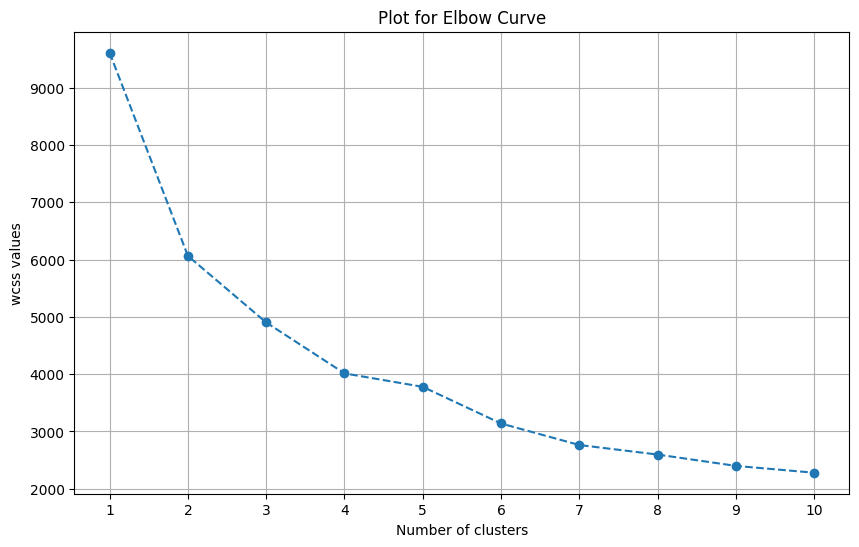

In [44]:
plt.figure(figsize=(10,6))
plt.title('Plot for Elbow Curve')
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.grid()
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('wcss values')

#### <span style='color:#6A9C89'>Knee Locator:</span>

In [26]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve='concave', direction='decreasing')
print(f'The clusters to be found is {kl.elbow}')

The clusters to be found is 10


#### <span style='color:#6A9C89'>Silhoutte Scoring:</span>

In [27]:
from sklearn.metrics import silhouette_score
sil_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(pca_transformed)
    score = silhouette_score(pca_transformed, kmeans.labels_)
    sil_scores.append(score)
    

#### <span style='color:#6A9C89'>K-Means Clustering Evaluation</span>

In [28]:
print(f'The silhouette scores are\n {sil_scores}')

The silhouette scores are
 [0.35629871292844284, 0.28528277821659204, 0.2882828317832344, 0.2819186818135249, 0.3021899287725384, 0.2595366382776039, 0.2967772425404922, 0.2639432477982835, 0.28698439754816246]


#### <span style='color:#6A9C89'>Silhoutte Elbow Curve:</span>

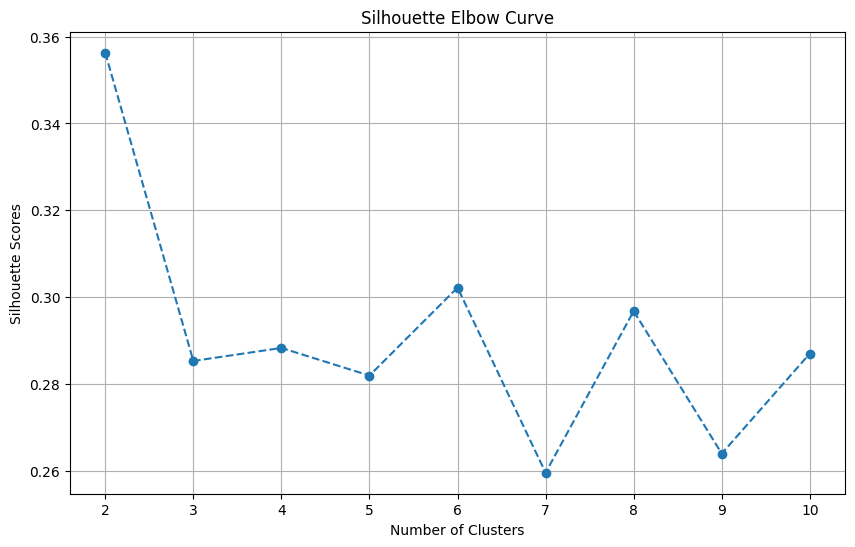

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.xticks(range(2, 11))
plt.grid()
plt.title('Silhouette Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()

#### <span style='color:#6A9C89'>Predictions for K-Means Clustering:</span>

In [30]:
## so from the graphs and findings we can conclude that the total number of clusters form is 10
kmeans = KMeans(n_clusters=10, init='k-means++')  ## kmeans++ refers to an initialization method for choosing the initial cluster centroids
y_pred_k_means = kmeans.fit_predict(pca_transformed)

#### <span style='color:#6A9C89'>Plotting the Predictions:</span>

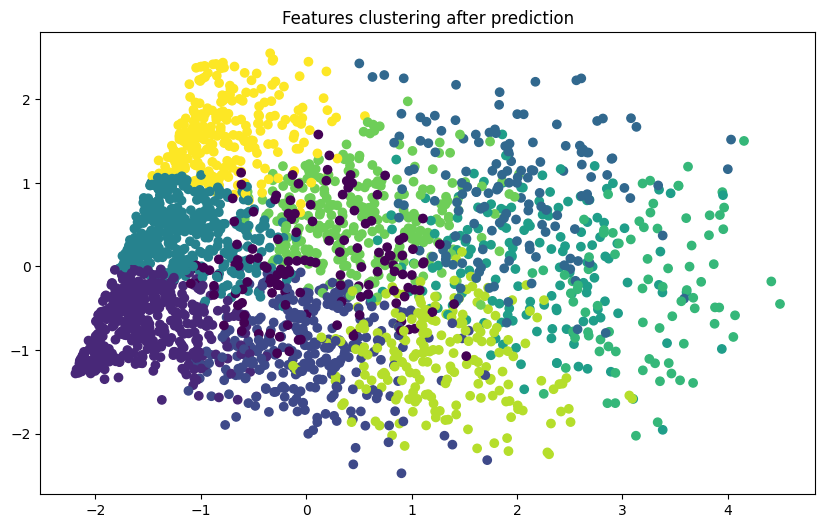

In [31]:
plt.figure(figsize=(10,6))
plt.title('Features clustering after prediction')
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=y_pred_k_means)
plt.show()

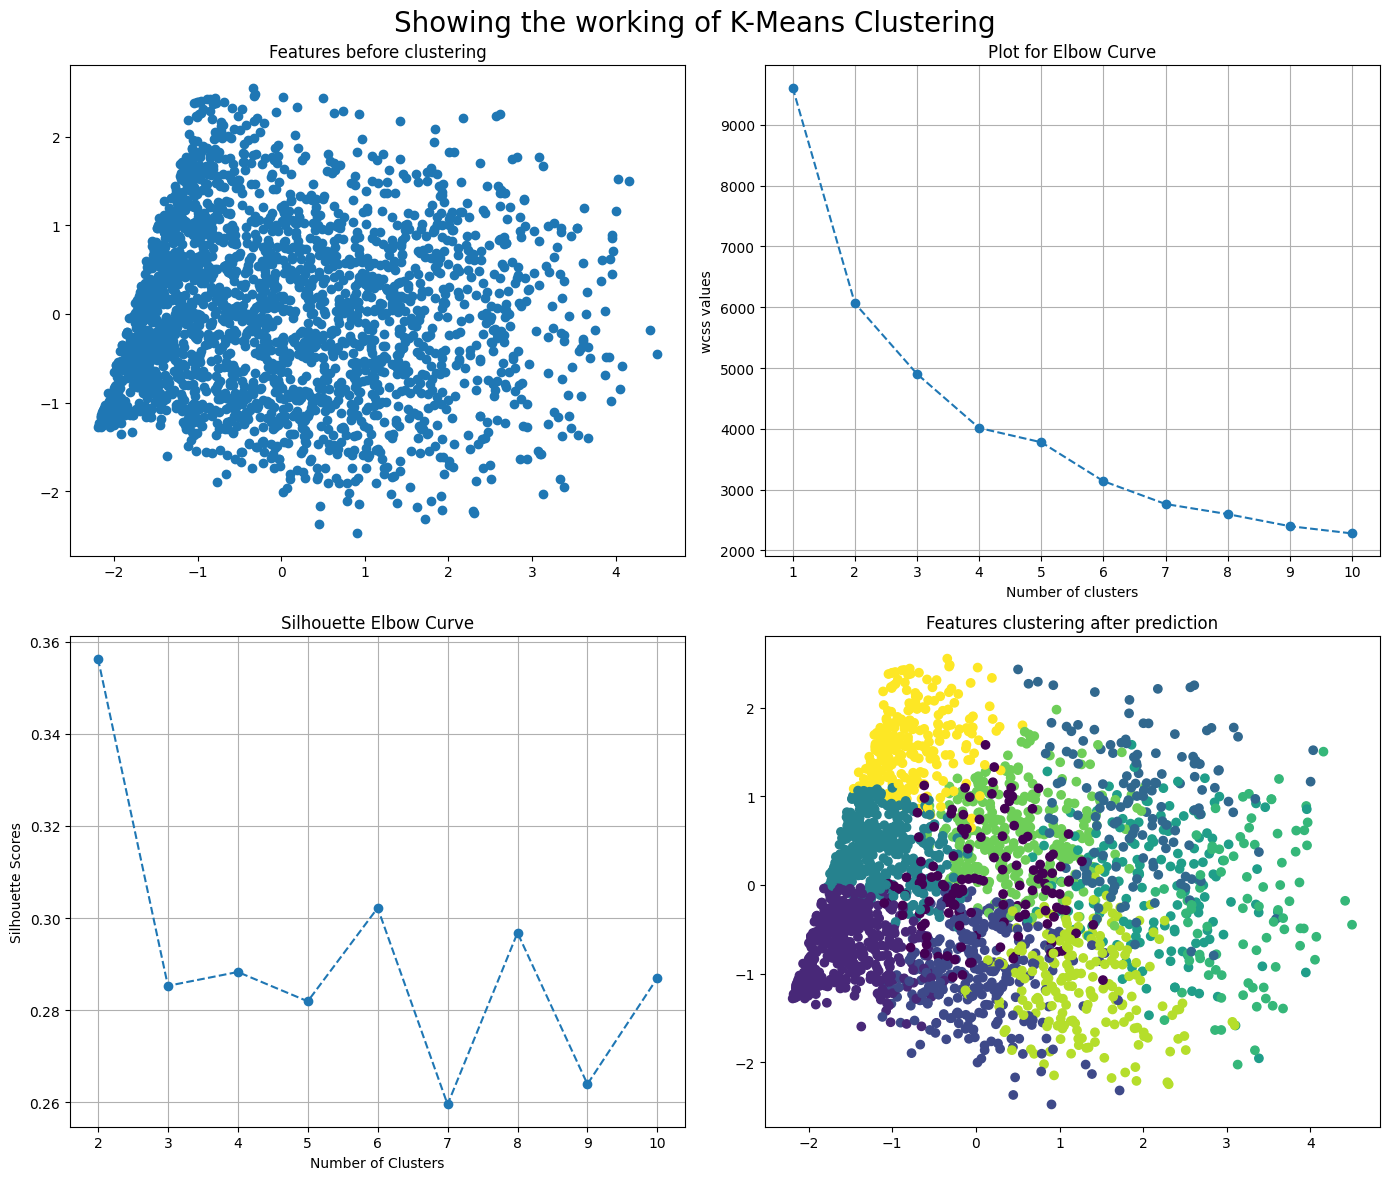

In [50]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
plt.suptitle('Showing the working of K-Means Clustering', fontsize=20)

# Plot 1: Features before clustering
axs[0, 0].scatter(pca_transformed[:, 0], pca_transformed[:, 1])
axs[0, 0].set_title('Features before clustering')

# Plot 2: Elbow Curve
axs[0, 1].plot(range(1, 11), wcss, marker='o', linestyle='--')
axs[0, 1].set_xticks(range(1, 11))
axs[0, 1].grid()
axs[0, 1].set_xlabel('Number of clusters')
axs[0, 1].set_ylabel('wcss values')
axs[0, 1].set_title('Plot for Elbow Curve')

# Plot 3: Silhouette Elbow Curve
axs[1, 0].plot(range(2, 11), sil_scores, marker='o', linestyle='--')
axs[1, 0].set_xticks(range(2, 11))
axs[1, 0].grid()
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_ylabel('Silhouette Scores')
axs[1, 0].set_title('Silhouette Elbow Curve')


# Plot 4: Features after clustering prediction
axs[1, 1].scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=y_pred_k_means)
axs[1, 1].set_title('Features clustering after prediction')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## <span style='color:#6A9C89'>Heirarchial Clustering:</span>

#### <span style='color:#6A9C89'>Creating Dendograms:</span>

Text(0, 0.5, 'Euclidean Distance')

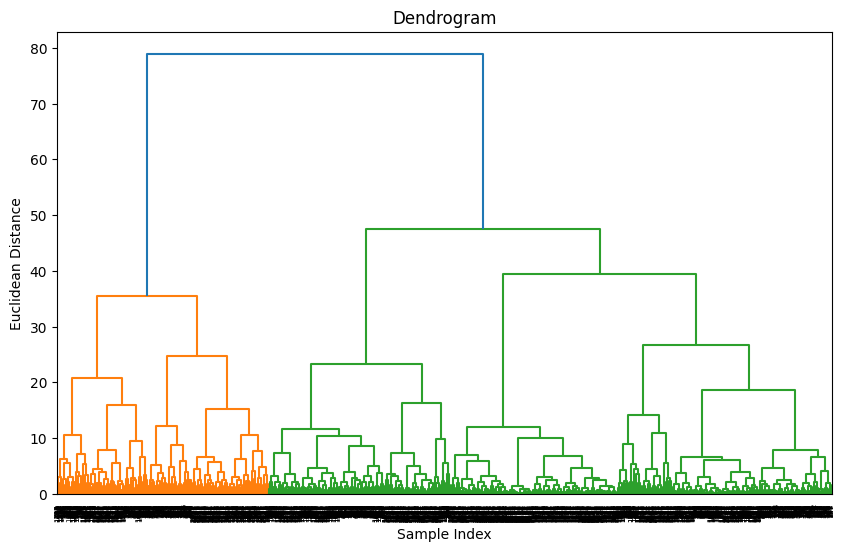

In [33]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(10,6))
plt.title('Dendrogram')
sc.dendrogram(sc.linkage(pca_transformed, method='ward'))
plt.xlabel('Sample Index')
plt.xticks(rotation=90)
plt.ylabel('Euclidean Distance')

#### <span style='color:#6A9C89'>Applying Agglomerative Clustering:</span>

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')

## predicting the clusters
y_pred_heirarchial = cluster.fit_predict(pca_transformed)

#### <span style='color:#6A9C89'>Evaluation for Hierarcial Clustering</span>

In [35]:
print(f'The labels of the Clusters are\n{cluster.labels_}')

The labels of the Clusters are
[4 4 4 ... 5 2 3]


#### <span style='color:#6A9C89'>Plotting the prediction:</span>

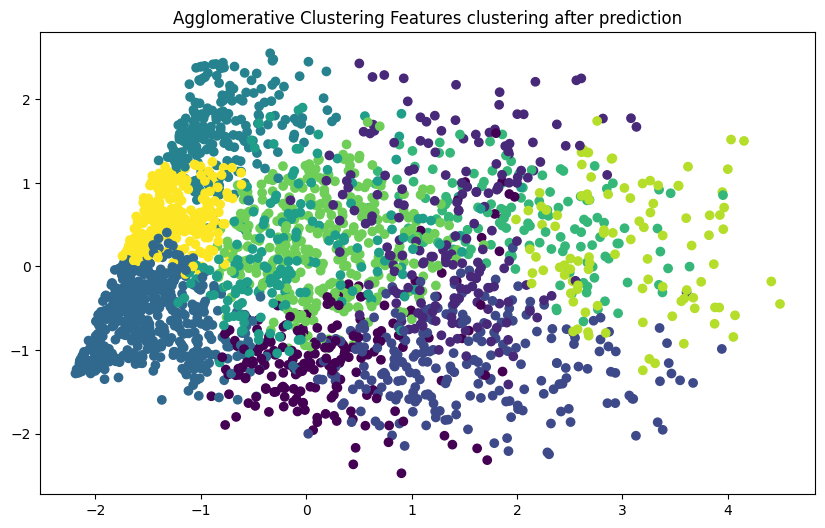

In [36]:
plt.figure(figsize=(10,6))
plt.title('Agglomerative Clustering Features clustering after prediction')
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=y_pred_heirarchial)
plt.show()

## <span style='color:#6A9C89'>DBSCAN : Density-Based Spatial Clustering of Applications with Noise</span>

### Finding Eps value in dbscan
##### Choosing the optimal value for eps in DBSCAN is critical because it determines how close points need to be to form a cluster.

#### <span style='color:#6A9C89'>Using Silhoutte Score Method</span>

In [37]:
## applying silhoutte scoring
from sklearn.cluster import DBSCAN

eps_values = np.linspace(0.1, 2, 20)  # trying different values for eps
silhoutte_score_eps = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    y_pred = dbscan.fit_predict(pca_transformed)

    # skipping if there is presence of noise
    if len(set(y_pred)) > 1:
        score = silhouette_score(pca_transformed, y_pred)
        silhoutte_score_eps.append(score)
    else:
        silhoutte_score_eps.append(-1)

# Find the highest silhouette score and corresponding eps value
best_eps_index = np.argmax(silhoutte_score_eps)
best_eps_value = eps_values[best_eps_index]
best_silhouette_score = silhoutte_score_eps[best_eps_index]

print(f"The best eps value is {best_eps_value} with a silhouette score of {best_silhouette_score}")


The best eps value is 1.2 with a silhouette score of 0.38650604380063874


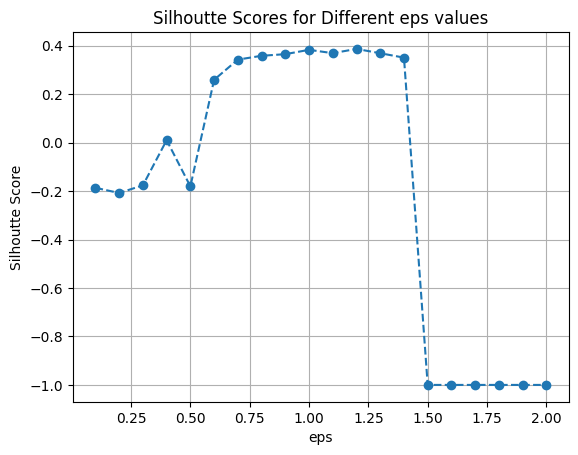

In [51]:
## plotting silhoutte score for different eps values
plt.plot(eps_values, silhoutte_score_eps, marker='o', linestyle='--')
plt.grid()
plt.title('Silhoutte Scores for Different eps values')
plt.xlabel('eps')
plt.ylabel('Silhoutte Score')
plt.show()

##### In this plot, look for the eps value that gives the highest silhouette score, which suggests the best clustering result.

#### <span style='color:#6A9C89'>Using Nearest Neighbors</span>

In [39]:
## calculate k-distance for each point (k = min_samples - 1)
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = nearest_neighbors.fit(pca_transformed)
distances, indices = neighbors_fit.kneighbors(pca_transformed)

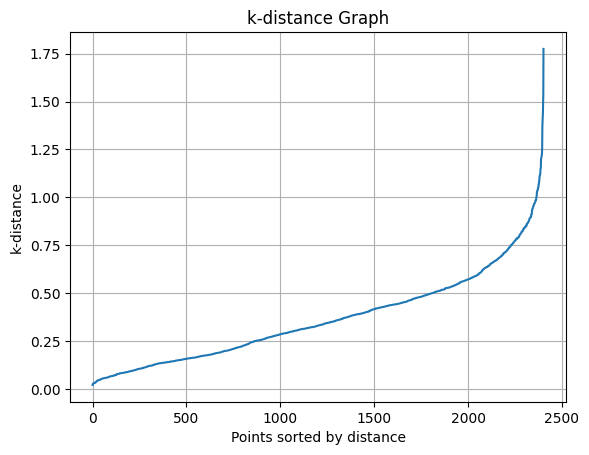

In [52]:
# Sort and plot the k-distances
plt.plot(np.sort(distances[:, 4]))  # 4 is for k=5 (min_samples)
plt.title('k-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance')
plt.grid()
plt.show()

#### The findings shows that the eps values found to be 1.4

In [41]:
## performing dbscan by following parameters and obtaining the prediction
db = DBSCAN(eps=0.5)
y_pred_dbscan = db.fit(pca_transformed)

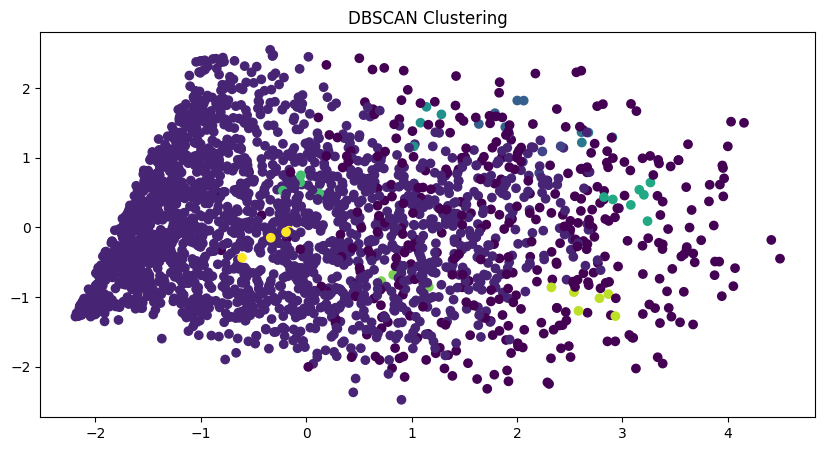

In [42]:
## plotting the prediction 
plt.figure(figsize=(10, 5))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=db.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

#### <span style='color:#6A9C89'>Evaluation for DBSCAN</span>

In [43]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_transformed)
dbscan_filtered_X = pca_transformed[dbscan_labels != -1]
dbscan_filtered_labels = dbscan_labels[dbscan_labels != -1]

if len(set(dbscan_filtered_labels)) > 1:
    silhouette_dbscan = silhouette_score(dbscan_filtered_X, dbscan_filtered_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
else:
    print("DBSCAN does not form enough clusters for silhouette score.")

DBSCAN Silhouette Score: -0.14222792058136585


## <span style='color:#6A9C89'>Conlusion</span>
    1. The Elbow Method and Silhouette Score suggest that 10 clusters is likely the most suitable choice for this dataset.
    2. The clustering appears reasonably effective, but the overlap in the bottom-right panel indicates that there might be some uncertainty at cluster boundaries.